# Proyecto 3- Carolina López 
El proyecto que se presenta a continuación tiene como objetivo analizar los datos del servicio postal en Uruguay durante el periodo de la pandemia de COVID-19, con el fin de comparar las tendencias observadas con el servicio postal de un país de América Latina y otro de Europa. Esto se lleva a cabo con el propósito de determinar si los patrones observados en Uruguay durante el período comprendido entre 2018 y 2021, que incluye el año en que se originó la pandemia en 2019, se replicaron en los países seleccionados para el estudio. Los patrones de estudio fueron elegidos en razon de el interés de obtener esa información.


## Análisis de Datos de el correo postal de Uruguay 

In [145]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Leer el archivo CSV que contiene los datos estadisticos de el correo postal de Uruguay
archivo_csv = 'envios-postales.csv' 
df = pd.read_csv(archivo_csv)

#Convertir la columna 'Fecha' a tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

#Extraer el año de la columna 'Fecha'
df['Año'] = df['Fecha'].dt.year

#Sumar las columnas en virtud de el año 
columnas_a_sumar = ['Cartas nacionales', 'Cartas internacionales salientes', 'Cartas internacionales entrantes',
                    'Cartas totales', 'Paquetes nacionales', 'Paquetes internacionales salientes',
                     'Paquetes internacionales entrantes', 'Paquetes totales']

df_agrupadouy = df.groupby('Año')[columnas_a_sumar].sum()

#Mostrar el DataFrame resultante
print(df_agrupadouy)

      Cartas nacionales  Cartas internacionales salientes  \
Año                                                         
2018           93353275                           1929488   
2019           97023646                           1557192   
2020           85125778                            839433   
2021           79478006                            258616   
2022           73044817                            298636   
2023           40224187                            118261   

      Cartas internacionales entrantes  Cartas totales  Paquetes nacionales  \
Año                                                                           
2018                            478080        95760843              5512441   
2019                            506354        99087192              6077951   
2020                            329905        86295116              7500007   
2021                            674803        80411425              9713726   
2022                            54744

### Limpieza de datos del dataframe de estadísticas de correo postal de Uruguay
En este apartado de codigos se seleccionaran los patrones de estudio que corresponden con Cartas Nacionales, Paquetes Entrantes y Paquetes Salientes.

In [146]:
# Eliminar columnas que no se utilizarán
columnas_a_eliminar = ['Cartas internacionales salientes', 'Cartas internacionales entrantes', 'Cartas totales', 'Paquetes nacionales', 'Paquetes totales']
df_agrupadouy = df_agrupadouy.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame resultante
print(df_agrupadouy)

      Cartas nacionales  Paquetes internacionales salientes  \
Año                                                           
2018           93353275                               44630   
2019           97023646                               57306   
2020           85125778                               43172   
2021           79478006                               80409   
2022           73044817                               76473   
2023           40224187                               46371   

      Paquetes internacionales entrantes  
Año                                       
2018                              229600  
2019                              243605  
2020                              222291  
2021                              271065  
2022                              297422  
2023                              251965  


### Generar un Dataframe a partir de el resultado obtenido anteriormente

In [147]:
# Definición de el dataframe 
data = {
    'Años': [2018, 2019, 2020],
    'Cartas nacionales': [93353275,97023646,85125778],
    'Paquetes internacionales salientes': [44630,57306,43172],
    'Paquetes internacionales entrantes': [229600,243605,222291],
}
df_uy = pd.DataFrame(data)

#Dataframe de Uruguay con los datos de estadisticas de el correo postal obtenidos 
print(df_uy)

   Años  Cartas nacionales  Paquetes internacionales salientes  \
0  2018           93353275                               44630   
1  2019           97023646                               57306   
2  2020           85125778                               43172   

   Paquetes internacionales entrantes  
0                              229600  
1                              243605  
2                              222291  


## Análisis de Datos de el correo postal de Italia y Colombia

### Paquetes internacionales salientes 

In [148]:
# Directorio que contiene los archivos HTML
archivos_html = ['Italia.html']

# Patrón regular para buscar el texto
patron_texto = r'Número de paquetes, servicio internacional - despacho'

# Función para buscar el patrón en un archivo HTML
def buscar_patron_en_archivo(archivo, patron):
    with open(archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()
        coincidencias = re.findall(patron, contenido)
        return coincidencias

# Bucle a través de los archivos y buscar el patrón
for archivo in archivos_html:
    coincidencias = buscar_patron_en_archivo(archivo, patron_texto)
    if coincidencias:
        for i, coincidencia in enumerate(coincidencias, start=1):
            print(f' {coincidencia}')
    else:
        print(f'No se encontraron coincidencias en {archivo}')

 Número de paquetes, servicio internacional - despacho


In [149]:
# Directorio que contiene los archivos HTML
archivos_html = ['Italia.html']

# Expresión regular para buscar años en el texto
expresion_regular_anios = r'Años:\s*(\d{4}(?:,\s*\d{4})*)'

# Expresión regular para encontrar las secciones de interés
expresión_regular_numeros = r'Número de paquetes, servicio internacional - despacho(.*?)<tr valign="top">'

# Listas para almacenar los años, los números y el nombre del archivo
anios_lista = []
numeros_lista = []
archivo_lista = []

# Bucle para procesar cada archivo
for nombre_archivo in archivos_html:
    with open(nombre_archivo, 'r', encoding='utf-8') as archivo:
        contenido = archivo.read()

    # Buscar los años en el contenido del archivo
    anios_encontrados = re.search(expresion_regular_anios, contenido)

    if anios_encontrados:
        anios_str = anios_encontrados.group(1)
        anios_lista = anios_str.split(', ')
    else:
        print(f"No se encontraron años en el archivo {nombre_archivo}.")

    # Buscar las secciones de interés en el contenido del archivo
    secciones = re.findall(expresión_regular_numeros, contenido, re.DOTALL)

    for seccion in secciones:
        # Dividir la sección en líneas
        lineas = seccion.split('\n')
        for linea in lineas:
            numeros = re.findall(r"(\d{1,3}(?:'\d{3})*)", linea)
            if numeros:
                for numero in numeros:
                    numero_sin_comas = numero.replace("'", '')
                    numeros_lista.append(numero_sin_comas)
                    archivo_lista.append(nombre_archivo)
            else:
                numeros_lista.append("NA")
                archivo_lista.append(nombre_archivo)

# Excluir el primer elemento y los últimos dos elementos de la lista de números
numeros_lista = numeros_lista[1:-2]
archivo_lista = archivo_lista[1:-2]

# Asegurarse de que ambas listas tengan la misma longitud rellenando con NaN si es necesario
max_length = max(len(anios_lista), len(numeros_lista), len(archivo_lista))
anios_lista.extend(['NA'] * (max_length - len(anios_lista)))
numeros_lista.extend(['NA'] * (max_length - len(numeros_lista)))
archivo_lista.extend(['NA'] * (max_length - len(archivo_lista)))

# Crear un DataFrame a partir de las listas de años, números y archivos
df4 = pd.DataFrame({'Años': anios_lista, 'Número de paquetes, servicio internacional - despacho Italia': numeros_lista})

# Mostrar el DataFrame
print(df4)

   Años Número de paquetes, servicio internacional - despacho Italia
0  2017                                             316317          
1  2018                                             342724          
2  2019                                             328928          
3  2020                                             263280          
4  2021                                                 NA          


In [150]:
# Directorio que contiene los archivos HTML de Colombia 
archivos_html = ['Colombia.html']

# Patrón regular para buscar el texto los paquetes salientes de Colombia
patron_texto = r'10.5 Number of parcels, international service - dispatch'

# Función para buscar el patrón en un archivo HTML
def buscar_patron_en_archivo(archivo, patron):
    with open(archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()
        coincidencias = re.findall(patron, contenido)
        return coincidencias

# Bucle a través de los archivos y buscar el patrón
for archivo in archivos_html:
    coincidencias = buscar_patron_en_archivo(archivo, patron_texto)
    if coincidencias:
        for i, coincidencia in enumerate(coincidencias, start=1):
            print(f' {coincidencia}')
    else:
        print(f'No se encontraron coincidencias en {archivo}')

 10.5 Number of parcels, international service - dispatch


In [151]:
# Directorio que contiene los archivos HTML
archivos_html = ['Colombia.html']

# Expresión regular para buscar años en el texto
expresion_regular_anios = r'Años:\s*(\d{4}(?:,\s*\d{4})*)'

# Expresión regular para encontrar las secciones de interés
expresión_regular_numeros = r'10.5 Number of parcels, international service - dispatch(.*?)<tr valign="top">'

# Listas para almacenar los años, los números y el nombre del archivo
anios_lista = []
numeros_lista = []
archivo_lista = []

# Bucle para procesar cada archivo
for nombre_archivo in archivos_html:
    with open(nombre_archivo, 'r', encoding='utf-8') as archivo:
        contenido = archivo.read()

    # Buscar las secciones de interés en el contenido del archivo
    secciones = re.findall(expresión_regular_numeros, contenido, re.DOTALL)

    for seccion in secciones:
        # Dividir la sección en líneas
        lineas = seccion.split('\n')
        for linea in lineas:
            numeros = re.findall(r"(\d{1,3}(?:'\d{3})*)", linea)
            if numeros:
                for numero in numeros:
                    numero_sin_comas = numero.replace("'", '')
                    numeros_lista.append(numero_sin_comas)
                    archivo_lista.append(nombre_archivo)
            else:
                numeros_lista.append("NA")
                archivo_lista.append(nombre_archivo)

# Excluir el primer elemento y los últimos dos elementos de la lista de números
numeros_lista = numeros_lista[1:-2]
archivo_lista = archivo_lista[1:-2]

# Asegurarse de que ambas listas tengan la misma longitud rellenando con NaN si es necesario
max_length = max(len(anios_lista), len(numeros_lista), len(archivo_lista))
anios_lista.extend(['NA'] * (max_length - len(anios_lista)))
numeros_lista.extend(['NA'] * (max_length - len(numeros_lista)))
archivo_lista.extend(['NA'] * (max_length - len(archivo_lista)))

# Crear un DataFrame a partir de las listas de años, números y archivos
df3 = pd.DataFrame({'Number of parcels, international service - dispatch Colombia': numeros_lista})

# Mostrar el DataFrame
print(df3)

  Number of parcels, international service - dispatch Colombia
0                                             176473          
1                                              21008          
2                                              13747          
3                                              44529          
4                                              56531          


### Paquetes internacionales entrantes 

In [152]:
# Directorio que contiene los archivos HTML
archivos_html = ['Italia.html']

# Patrón regular para buscar el texto
patron_texto = r'Número de paquetes, servicio internacional - recibo'

# Función para buscar el patrón en un archivo HTML
def buscar_patron_en_archivo(archivo, patron):
    with open(archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()
        coincidencias = re.findall(patron, contenido)
        return coincidencias

# Bucle a través de los archivos y buscar el patrón
for archivo in archivos_html:
    coincidencias = buscar_patron_en_archivo(archivo, patron_texto)
    if coincidencias:
        for i, coincidencia in enumerate(coincidencias, start=1):
            print(f' {coincidencia}')
    else:
        print(f'No se encontraron coincidencias en {archivo}')

 Número de paquetes, servicio internacional - recibo


In [153]:
# Directorio que contiene los archivos HTML
archivos_html = ['Italia.html']

# Expresión regular para buscar años en el texto
expresion_regular_anios = r'Años:\s*(\d{4}(?:,\s*\d{4})*)'

# Expresión regular para encontrar las secciones de interés
expresión_regular_numeros = r'Número de paquetes, servicio internacional - recibo(.*?)<tr valign="top&quot;">'

# Listas para almacenar los años, los números y el nombre del archivo
anios_lista = []
numeros_lista = []
archivo_lista = []

# Bucle para procesar cada archivo
for nombre_archivo in archivos_html:
    with open(nombre_archivo, 'r', encoding='utf-8') as archivo:
        contenido = archivo.read()

    # Buscar los años en el contenido del archivo
    anios_encontrados = re.search(expresion_regular_anios, contenido)

    if anios_encontrados:
        anios_str = anios_encontrados.group(1)
        anios_lista = anios_str.split(', ')
    else:
        print(f"No se encontraron años en el archivo {nombre_archivo}.")

    # Buscar las secciones de interés en el contenido del archivo
    secciones = re.findall(expresión_regular_numeros, contenido, re.DOTALL)

    for seccion in secciones:
        # Dividir la sección en líneas
        lineas = seccion.split('\n')
        for linea in lineas:
            numeros = re.findall(r"(\d{1,3}(?:'\d{3})*)", linea)
            if numeros:
                for numero in numeros:
                    numero_sin_comas = numero.replace("'", '')
                    numeros_lista.append(numero_sin_comas)
                    archivo_lista.append(nombre_archivo)
            else:
                numeros_lista.append("NA")
                archivo_lista.append(nombre_archivo)

# Excluir el primer elemento y los últimos dos elementos de la lista de números
numeros_lista = numeros_lista[1:-2]
archivo_lista = archivo_lista[1:-2]

# Asegurarse de que ambas listas tengan la misma longitud rellenando con NaN si es necesario
max_length = max(len(anios_lista), len(numeros_lista), len(archivo_lista))
anios_lista.extend(['NA'] * (max_length - len(anios_lista)))
numeros_lista.extend(['NA'] * (max_length - len(numeros_lista)))
archivo_lista.extend(['NA'] * (max_length - len(archivo_lista)))

# Crear un DataFrame a partir de las listas de años, números y archivos
df6 = pd.DataFrame({'Número de paquetes, servicio internacional - recibo Italia': numeros_lista})

# Mostrar el DataFrame
print(df6)

  Número de paquetes, servicio internacional - recibo Italia
0                                             379540        
1                                             336313        
2                                             327314        
3                                             305400        
4                                                 NA        


In [154]:
# Directorio que contiene los archivos HTML
archivos_html = ['Colombia.html']

# Patrón regular para buscar el texto
patron_texto = r'Number of parcels, international service - receipt'

# Función para buscar el patrón en un archivo HTML
def buscar_patron_en_archivo(archivo, patron):
    with open(archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()
        coincidencias = re.findall(patron, contenido)
        return coincidencias

# Bucle a través de los archivos y buscar el patrón
for archivo in archivos_html:
    coincidencias = buscar_patron_en_archivo(archivo, patron_texto)
    if coincidencias:
        for i, coincidencia in enumerate(coincidencias, start=1):
            print(f' {coincidencia}')
    else:
        print(f'No se encontraron coincidencias en {archivo}')

 Number of parcels, international service - receipt


In [155]:
# Directorio que contiene los archivos HTML
archivos_html = ['Colombia.html']

# Expresión regular para encontrar las secciones de interés
expresión_regular_numeros = r'Number of parcels, international service - receipt(.*?)<tr valign="top&quot;">'

# Listas para almacenar  los números y el nombre del archivo
numeros_lista = []
archivo_lista = []

# Bucle para procesar cada archivo
for nombre_archivo in archivos_html:
    with open(nombre_archivo, 'r', encoding='utf-8') as archivo:
        contenido = archivo.read()
    # Buscar las secciones de interés en el contenido del archivo
    secciones = re.findall(expresión_regular_numeros, contenido, re.DOTALL)

    for seccion in secciones:
        # Dividir la sección en líneas
        lineas = seccion.split('\n')
        for linea in lineas:
            numeros = re.findall(r"(\d{1,3}(?:'\d{3})*)", linea)
            if numeros:
                for numero in numeros:
                    numero_sin_comas = numero.replace("'", '')
                    numeros_lista.append(numero_sin_comas)
                    archivo_lista.append(nombre_archivo)
            else:
                numeros_lista.append("NA")
                archivo_lista.append(nombre_archivo)

# Excluir el primer elemento y los últimos dos elementos de la lista de números
numeros_lista = numeros_lista[1:-2]
archivo_lista = archivo_lista[1:-2]

# Crear un DataFrame a partir de las listas de números y archivos
df5 = pd.DataFrame({'Number of parcels, international service - receipt Colombia': numeros_lista})

# Mostrar el DataFrame
print(df5)

  Number of parcels, international service - receipt Colombia
0                                              26760         
1                                              71892         
2                                              67463         
3                                              63426         
4                                               7506         


### Cartas nacionales

In [166]:
# Directorio que contiene los archivos HTML
archivos_html = ['Italia.html', 'Colombia.html']

# Patrón regular para buscar el texto
patron_texto = r'2.3 Servicios de entrega de cartas nacionales: número de envíos'

# Función para buscar el patrón en un archivo HTML
def buscar_patron_en_archivo(archivo, patron):
    with open(archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()
        coincidencias = re.findall(patron, contenido)
        return coincidencias

# Bucle a través de los archivos y buscar el patrón
for archivo in archivos_html:
    coincidencias = buscar_patron_en_archivo(archivo, patron_texto)
    if coincidencias:
        for i, coincidencia in enumerate(coincidencias, start=1):
            print(f' {coincidencia}')
    else:
        print(f'No se encontraron coincidencias en {archivo}')


 2.3 Servicios de entrega de cartas nacionales: número de envíos
 2.3 Servicios de entrega de cartas nacionales: número de envíos


In [157]:
import re
import pandas as pd

# Directorio que contiene los archivos HTML
archivos_html = ['Italia.html']

# Expresión regular para encontrar las secciones de interés
expresión_regular_numeros = r'2.3 Servicios de entrega de cartas nacionales: número de envíos(.*?)<tr valign="top&quot;">'

# Listas para almacenar los años, los números y el nombre del archivo
numeros_lista = []
archivo_lista = []

# Bucle para procesar cada archivo
for nombre_archivo in archivos_html:
    with open(nombre_archivo, 'r', encoding='utf-8') as archivo:
        contenido = archivo.read()

    # Buscar las secciones de interés en el contenido del archivo
    secciones = re.findall(expresión_regular_numeros, contenido, re.DOTALL)

    for seccion in secciones:
        # Dividir la sección en líneas
        lineas = seccion.split('\n')
        for linea in lineas:
            numeros = re.findall(r"(\d{1,3}(?:'\d{3})*)", linea)
            if numeros:
                for numero in numeros:
                    numero_sin_comas = numero.replace("'", '')
                    numeros_lista.append(numero_sin_comas)
                    archivo_lista.append(nombre_archivo)
            else:
                numeros_lista.append("NA")
                archivo_lista.append(nombre_archivo)

# Excluir el primer elemento y los últimos dos elementos de la lista de números
numeros_lista = numeros_lista[1:-2]
archivo_lista = archivo_lista[1:-2]

# Asegurarse de que ambas listas tengan la misma longitud rellenando con NaN si es necesario
max_length = max(len(numeros_lista), len(archivo_lista))
numeros_lista.extend(['NA'] * (max_length - len(numeros_lista)))
archivo_lista.extend(['NA'] * (max_length - len(archivo_lista)))

# Crear un DataFrame a partir de las listas de años, números y archivos
df1 = pd.DataFrame({'Servicios de entrega de cartas nacionales: número de envíos Italia': numeros_lista})

# Mostrar el DataFrame
print(df1)



  Servicios de entrega de cartas nacionales: número de envíos Italia
0                                                 NA                
1                                         3216000000                
2                                         2752100000                
3                                                 NA                
4                                         2229474900                


In [158]:
# Directorio que contiene los archivos HTML
archivos_html = ['Colombia.html']

# Expresión regular para encontrar las secciones de interés
expresión_regular_numeros = r'Servicios de entrega de cartas nacionales: número de envíos(.*?)<tr valign="top&quot;">'

# Listas para almacenar los años, los números y el nombre del archivo
numeros_lista = []
archivo_lista = []

# Bucle para procesar cada archivo
for nombre_archivo in archivos_html:
    with open(nombre_archivo, 'r', encoding='utf-8') as archivo:
        contenido = archivo.read()

    # Buscar las secciones de interés en el contenido del archivo
    secciones = re.findall(expresión_regular_numeros, contenido, re.DOTALL)

    for seccion in secciones:
        # Dividir la sección en líneas
        lineas = seccion.split('\n')
        for linea in lineas:
            numeros = re.findall(r"(\d{1,3}(?:'\d{3})*)", linea)
            if numeros:
                for numero in numeros:
                    numero_sin_comas = numero.replace("'", '')
                    numeros_lista.append(numero_sin_comas)
                    archivo_lista.append(nombre_archivo)
            else:
                numeros_lista.append("NA")
                archivo_lista.append(nombre_archivo)

# Excluir el primer elemento y los últimos dos elementos de la lista de números
numeros_lista = numeros_lista[1:-2]
archivo_lista = archivo_lista[1:-2]

# Asegurarse de que ambas listas tengan la misma longitud rellenando con NaN si es necesario
max_length = max(len(numeros_lista), len(archivo_lista))
numeros_lista.extend(['NA'] * (max_length - len(numeros_lista)))
archivo_lista.extend(['NA'] * (max_length - len(archivo_lista)))

# Crear un DataFrame a partir de las listas de años, números y archivos
df2 = pd.DataFrame({'Servicios de entrega de cartas nacionales: número de envíos Colombia': numeros_lista})


# Mostrar el DataFrame
print(df2)

  Servicios de entrega de cartas nacionales: número de envíos Colombia
0                                                 NA                  
1                                          105309351                  
2                                           84300923                  
3                                           94491755                  
4                                           77407558                  


## Limpieza y combinación de Dataframe

### Combinar diferentes Dataframes

### Combinar Dataframes Italia y Colombia 

In [159]:
# Puedes combinar columnas de df1 y df2 en un nuevo DataFrame, df_combinado
df_combinado = pd.concat([df4,df1, df2,df3,df5,df6], axis=1)

# Ahora, df_combinado contendrá todas las columnas de df1 y df2
print(df_combinado)


   Años Número de paquetes, servicio internacional - despacho Italia  \
0  2017                                             316317             
1  2018                                             342724             
2  2019                                             328928             
3  2020                                             263280             
4  2021                                                 NA             

  Servicios de entrega de cartas nacionales: número de envíos Italia  \
0                                                 NA                   
1                                         3216000000                   
2                                         2752100000                   
3                                                 NA                   
4                                         2229474900                   

  Servicios de entrega de cartas nacionales: número de envíos Colombia  \
0                                                 NA        

### Eliminar años que no se utilizarán 

In [160]:
indices_a_eliminar = [0, 4]
df_combinado= df_combinado.drop(indices_a_eliminar)

# Mostrar el DataFrame resultante sin las filas en los índices 0 y 4
print(df_combinado)

   Años Número de paquetes, servicio internacional - despacho Italia  \
1  2018                                             342724             
2  2019                                             328928             
3  2020                                             263280             

  Servicios de entrega de cartas nacionales: número de envíos Italia  \
1                                         3216000000                   
2                                         2752100000                   
3                                                 NA                   

  Servicios de entrega de cartas nacionales: número de envíos Colombia  \
1                                          105309351                     
2                                           84300923                     
3                                           94491755                     

  Number of parcels, international service - dispatch Colombia  \
1                                              21008       

### Union de Dataframes de Uruguay con Dataframe Italia y Colombia 

In [161]:
# Convertir la columna "Años" a tipo int64 en ambos DataFrames
df_uy['Años'] = df_uy['Años'].astype(int)
df_combinado['Años'] = df_combinado['Años'].astype(int)

# Unir df_uy y df_combinado en función de la columna "Años"
df_unido = df_uy.merge(df_combinado, on='Años')

print(df_unido)

   Años  Cartas nacionales  Paquetes internacionales salientes  \
0  2018           93353275                               44630   
1  2019           97023646                               57306   
2  2020           85125778                               43172   

   Paquetes internacionales entrantes  \
0                              229600   
1                              243605   
2                              222291   

  Número de paquetes, servicio internacional - despacho Italia  \
0                                             342724             
1                                             328928             
2                                             263280             

  Servicios de entrega de cartas nacionales: número de envíos Italia  \
0                                         3216000000                   
1                                         2752100000                   
2                                                 NA                   

  Servicios de e

## Data Frame final 

In [162]:
# Renombrar las columnas
df_final = df_unido.rename(columns={
    'Años': 'Año',
    'Cartas nacionales': 'Cartas Nacionales Uruguay',
    'Paquetes internacionales salientes': 'Paquetes internacionales salientes Uruguay',
    'Paquetes internacionales entrantes': 'Paquetes internacionales entrantes Uruguay',
    'Número de paquetes, servicio internacional - despacho Italia': 'Paquetes internacionales salientes Italia',
    'Servicios de entrega de cartas nacionales: número de envíos Italia': 'Cartas Nacionales Italia',
    'Servicios de entrega de cartas nacionales: número de envíos Colombia': 'Cartas Nacionales Colombia',
    'Number of parcels, international service - dispatch Colombia': 'Paquetes internacionales salientes Colombia',
    'Number of parcels, international service - receipt Colombia': 'Paquetes internacionales entrantes Colombia',
    'Número de paquetes, servicio internacional - recibo Italia': 'Paquetes internacionales entrantes Italia',
})

df_final

,Año,Cartas Nacionales Uruguay,Paquetes internacionales salientes Uruguay,Paquetes internacionales entrantes Uruguay,Paquetes internacionales salientes Italia,Cartas Nacionales Italia,Cartas Nacionales Colombia,Paquetes internacionales salientes Colombia,Paquetes internacionales entrantes Colombia,Paquetes internacionales entrantes Italia
0,2018,93353275,44630,229600,342724,3216000000,105309351,21008,71892,336313
1,2019,97023646,57306,243605,328928,2752100000,84300923,13747,67463,327314
2,2020,85125778,43172,222291,263280,NA,94491755,44529,63426,305400


## Muestra datos en gráficos

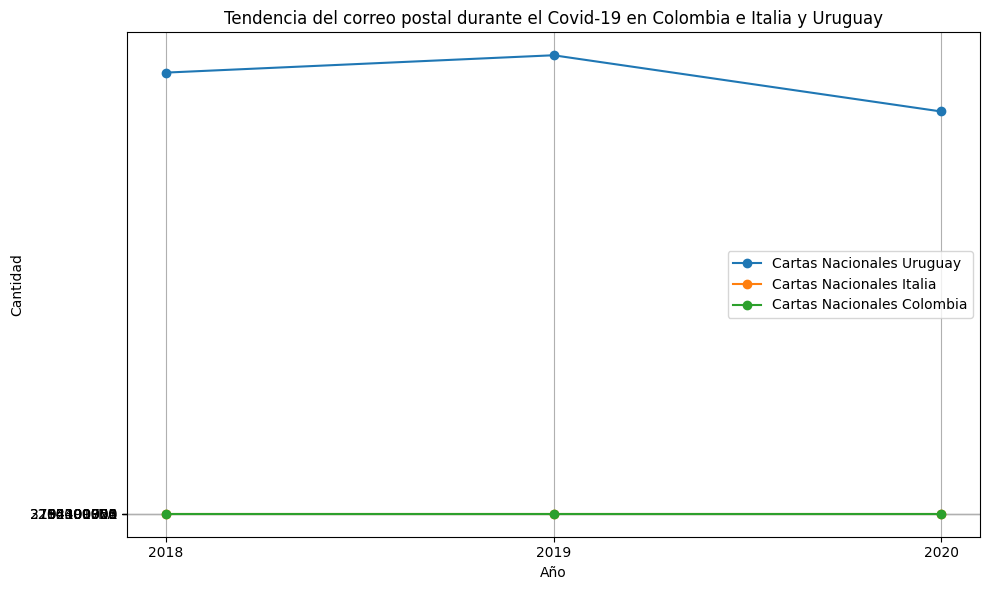

In [163]:
# Título del gráfico
titulo = 'Tendencia del correo postal durante el Covid-19 en Colombia e Italia y Uruguay'

# Crear un gráfico de tendencia
plt.figure(figsize=(10, 6))
plt.plot(df_final['Año'], df_final['Cartas Nacionales Uruguay'], label='Cartas Nacionales Uruguay', marker='o')
plt.plot(df_final['Año'], df_final['Cartas Nacionales Italia'], label='Cartas Nacionales Italia', marker='o')
plt.plot(df_final['Año'], df_final['Cartas Nacionales Colombia'], label='Cartas Nacionales Colombia', marker='o')


# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title(titulo)
plt.grid(True)
plt.legend()
plt.xticks(df_final['Año'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()

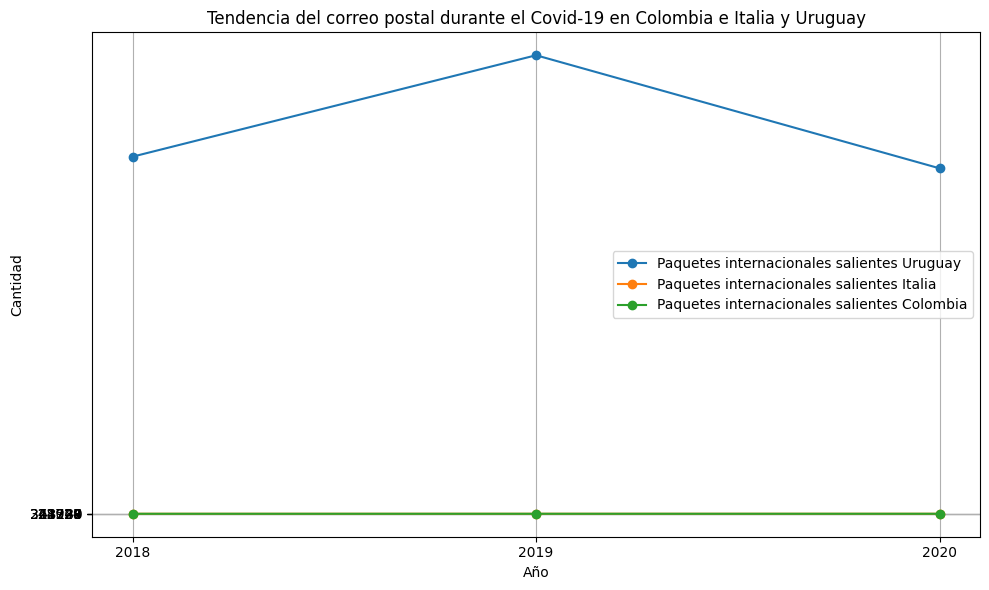

In [164]:
import matplotlib.pyplot as plt

# Título del gráfico
titulo = 'Tendencia del correo postal durante el Covid-19 en Colombia e Italia y Uruguay'

# Crear un gráfico de tendencia
plt.figure(figsize=(10, 6))

plt.plot(df_final['Año'], df_final['Paquetes internacionales salientes Uruguay'], label='Paquetes internacionales salientes Uruguay', marker='o')
plt.plot(df_final['Año'], df_final['Paquetes internacionales salientes Italia'], label='Paquetes internacionales salientes Italia', marker='o')
plt.plot(df_final['Año'], df_final['Paquetes internacionales salientes Colombia'], label='Paquetes internacionales salientes Colombia', marker='o')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title(titulo)
plt.grid(True)
plt.legend()
plt.xticks(df_final['Año'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()

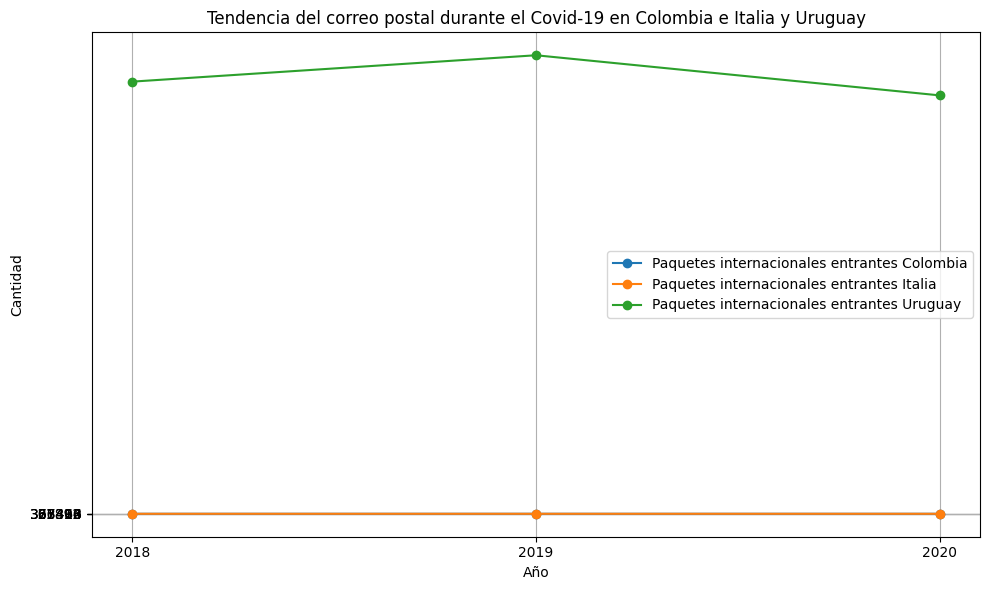

In [165]:
import matplotlib.pyplot as plt

# Título del gráfico
titulo = 'Tendencia del correo postal durante el Covid-19 en Colombia e Italia y Uruguay'

# Crear un gráfico de tendencia
plt.figure(figsize=(10, 6))

plt.plot(df_final['Año'], df_final['Paquetes internacionales entrantes Colombia'], label='Paquetes internacionales entrantes Colombia', marker='o')
plt.plot(df_final['Año'], df_final['Paquetes internacionales entrantes Italia'], label='Paquetes internacionales entrantes Italia', marker='o')
plt.plot(df_final['Año'], df_final['Paquetes internacionales entrantes Uruguay'], label='Paquetes internacionales entrantes Uruguay', marker='o')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title(titulo)
plt.grid(True)
plt.legend()
plt.xticks(df_final['Año'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()